# EDA Background

The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

The data that was sent over includes:

Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
Historical pricing data: variable and fixed pricing data etc
Churn indicator: whether each customer has churned or not

Please submit analysis in a code script, notebook, or PDF format. 

Please note, there are multiple ways to approach the task and that the sample answer is just one way to do it.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#import data 
client = pd.read_csv("../Data/client_data.csv")
price = pd.read_csv("../Data/price_data.csv")

In [3]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


<b>Sub-Task 1:</b>

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

# EDA

In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [6]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

### Statistics

In [7]:
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Visuals

Text(0.5, 1.0, 'Churn Clients')

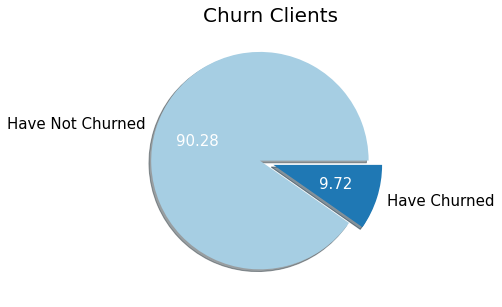

In [9]:
colors= sns.color_palette('Paired')
al = client["churn"].value_counts()
myexplode = [0.10, 0.03]
labels = ["Have Not Churned", "Have Churned"]

pie, ax = plt.subplots(figsize=[10,5])
_, _, autotexts = plt.pie(al, labels = labels, colors=colors, autopct="%.2f", 
                          explode = myexplode, shadow=True, textprops={'fontsize': 15})

for ins in autotexts:
    ins.set_color('white')

plt.title("Churn Clients", fontsize=20)

Almost 10% of cleints have churned.

### Sales Channel

In [10]:
channel = client[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

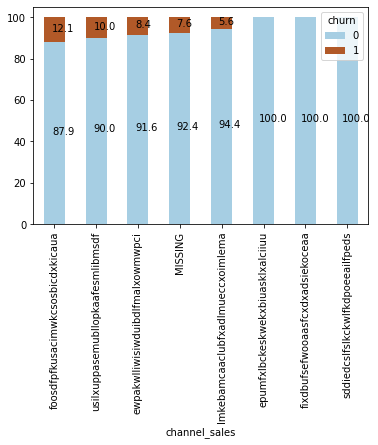

In [11]:
ax = channel_churn.plot.bar(stacked=True, cmap="Paired")
for p in ax.patches:
    pad=0.99
    # Calculate annotation
    value = str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value == '0.0':
        continue
    ax.annotate(
        value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, 
         (p.get_y()+p.get_height()/2)*pad)

    )

The churning customers are distributed over 5 different values for channel_sales. As
well as this, the value of MISSING has a churn rate of 7.6%. MISSING indicates a missing value and
was added by the team when they were cleaning the dataset. This feature could be an important
feature when it comes to building our model.

## Consumption

The distribution of the consumption in the last year and month.

Text(0.5, 1.0, 'Consumption of gas in the past 12 months.')

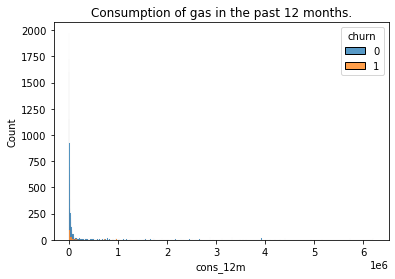

In [12]:
ax = sns.histplot(x="cons_12m", data=client, hue="churn", multiple="stack")
ax.set_title("Consumption of gas in the past 12 months.")

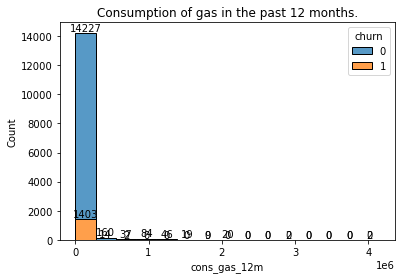

In [13]:
ax = sns.histplot(x="cons_gas_12m", data=client, hue="churn", multiple="stack")
ax.set_title("Consumption of gas in the past 12 months.")
for container in ax.containers:
    ax.bar_label(container)

'for container in ax.containers:\n    ax.bar_label(container)'

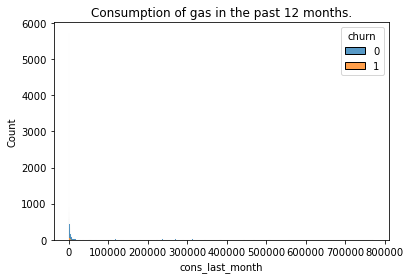

In [14]:
ax = sns.histplot(x="cons_last_month", data=client, hue="churn", multiple="stack")
ax.set_title("Consumption of gas in the past 12 months.")
"""for container in ax.containers:
    ax.bar_label(container)"""

'for container in ax.containers:\n    ax.bar_label(container)'

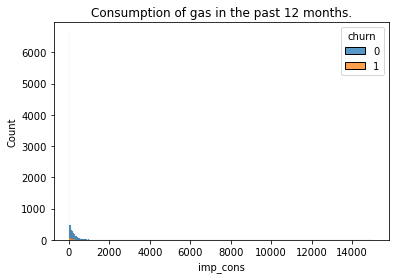

In [15]:
ax = sns.histplot(x="imp_cons", data=client, hue="churn", multiple="stack")
ax.set_title("Consumption of gas in the past 12 months.")
"""for container in ax.containers:
    ax.bar_label(container)"""

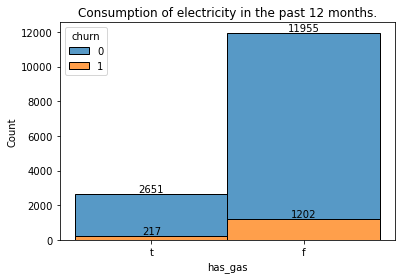

In [16]:
ax = sns.histplot(x="has_gas", data=client, hue="churn", multiple="stack")
ax.set_title("Consumption of electricity in the past 12 months.")
for container in ax.containers:
    ax.bar_label(container)

The consumption data is highly positively skewed, presenting a very long right-tail towards
the higher values of the distribution. The values on the higher and lower end of the distribution are
likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot
is a standardized way of displaying the distribution based on a five number summary: - Minimum

First quartile (Q1) - Median - Third quartile (Q3) - Maximum
It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how
tightly our data is grouped and if/how our data is skewed.

/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

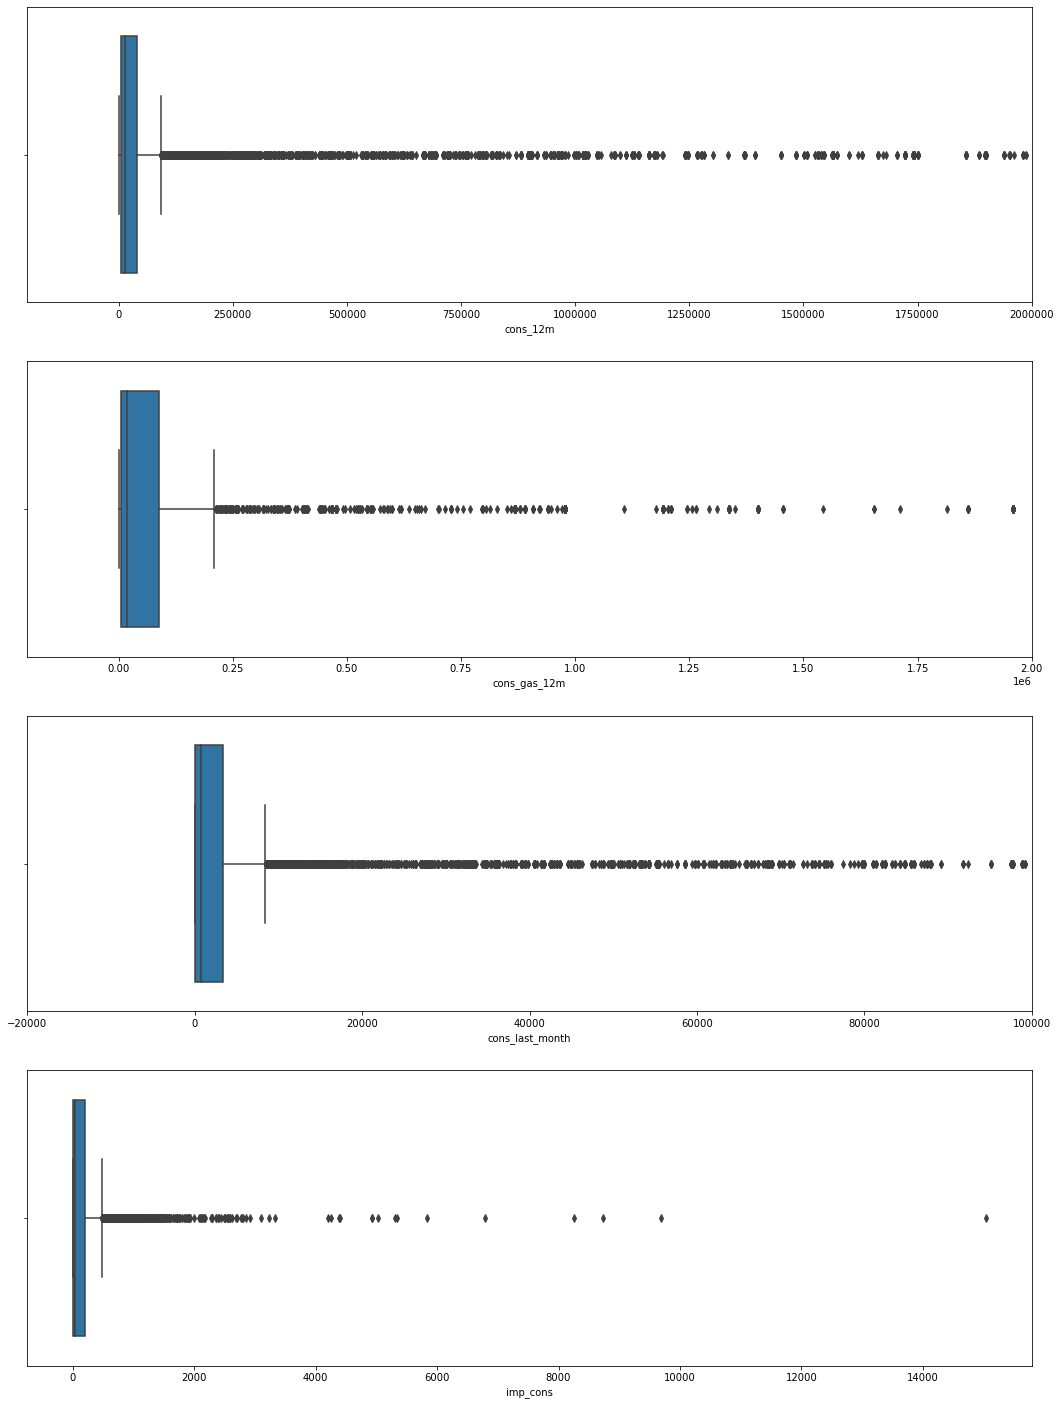

In [17]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(client["cons_12m"], ax=axs[0])
sns.boxplot(client[client["has_gas"] == "t"]["cons_gas_12m"],ax=axs[1])
sns.boxplot(client["cons_last_month"], ax=axs[2])
sns.boxplot(client["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

There is a lot of skewness that will be delt with in the feature engineering step.

## Forcast

In [18]:
def plot_distribution(dataframe, column, ax, bins_=50):

    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax,stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

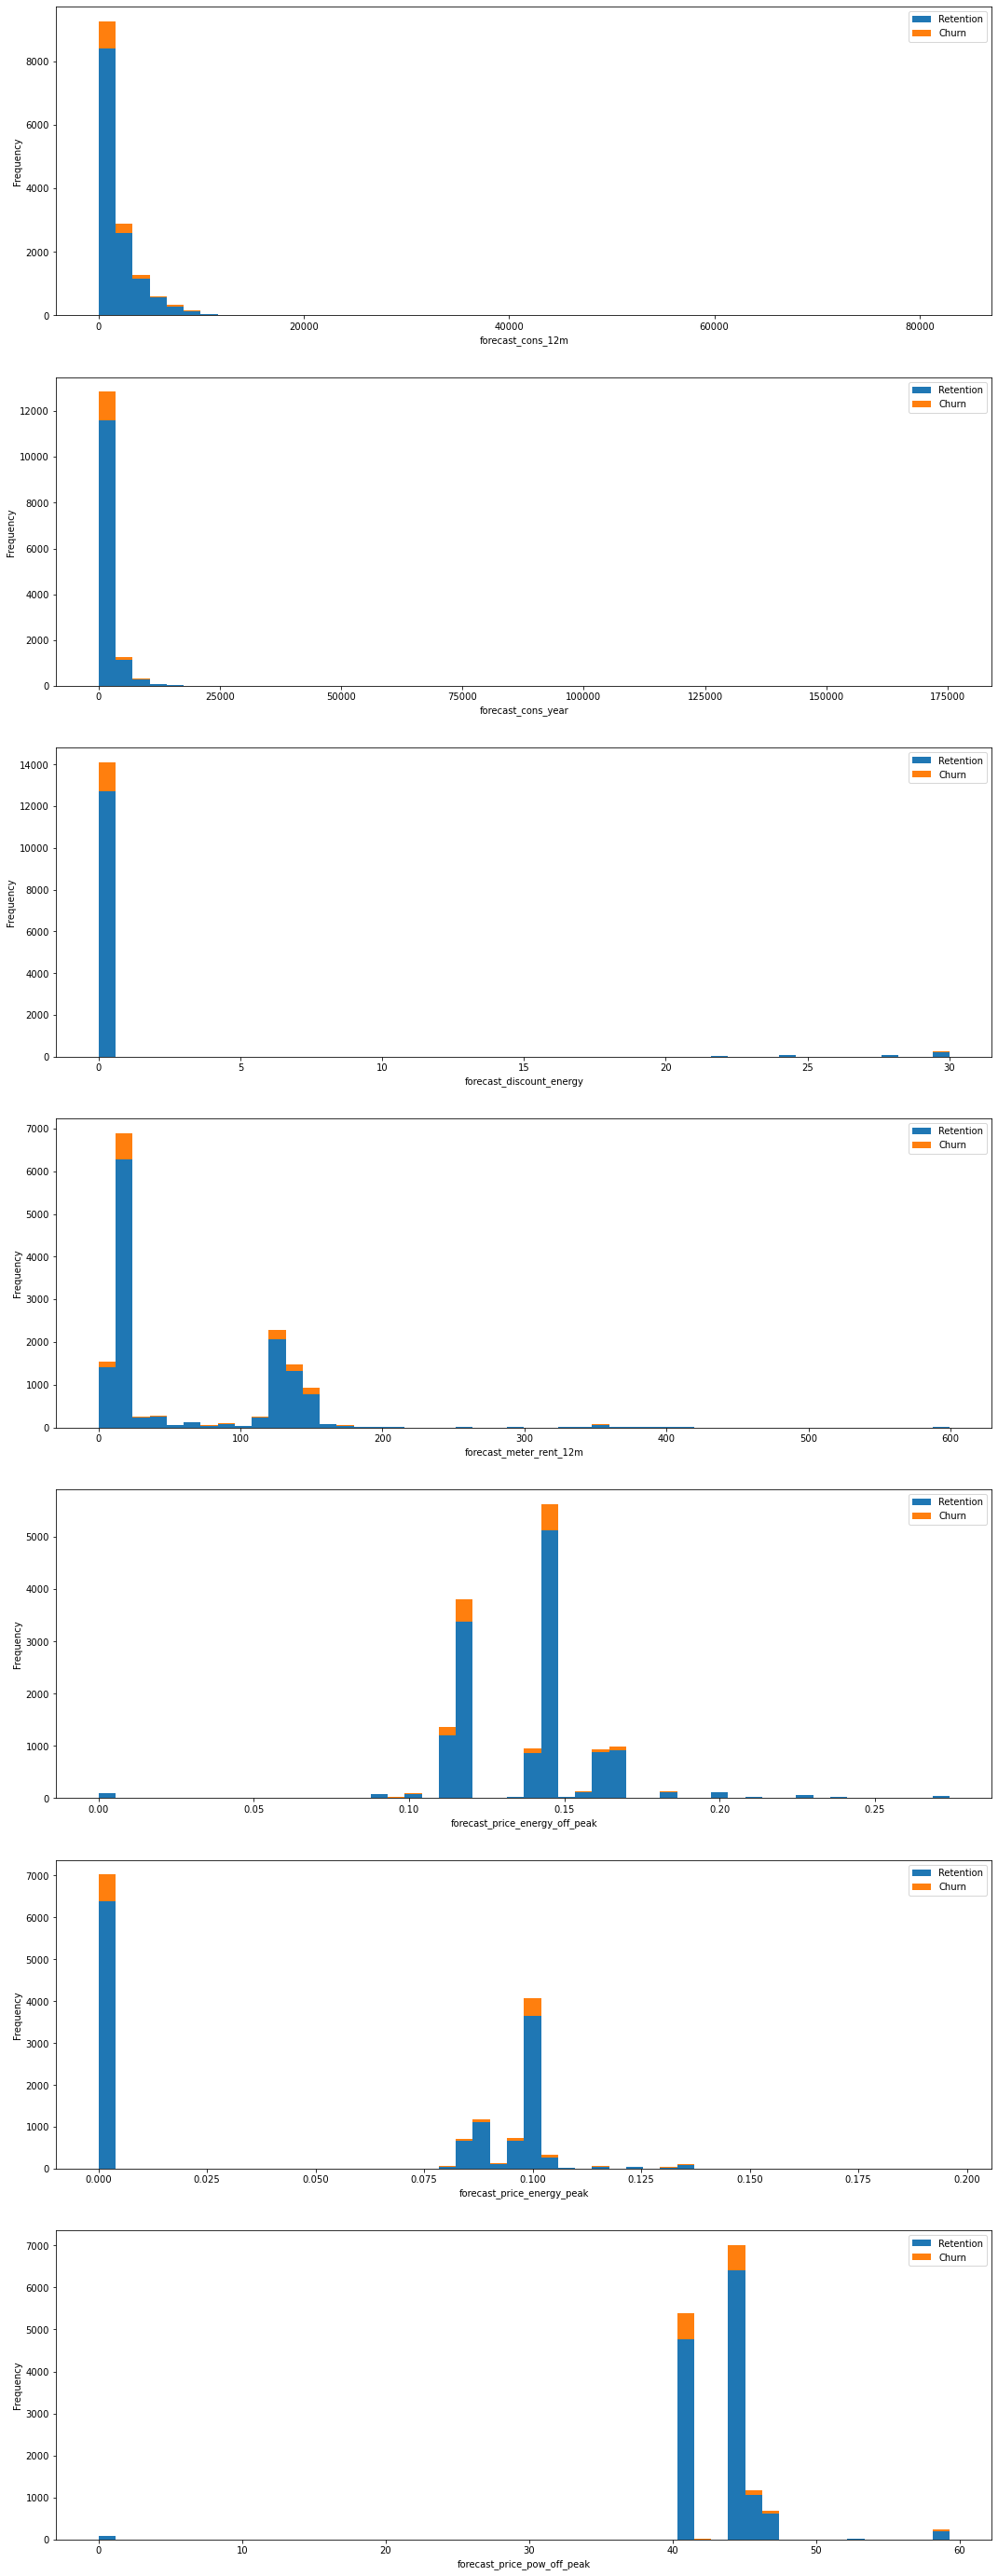

In [19]:
forecast = client[["id",'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 
                   'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 
                   'forecast_price_energy_peak','forecast_price_pow_off_peak',"churn"]]


fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histogram
plot_distribution(client, "forecast_cons_12m", axs[0])
plot_distribution(client, "forecast_cons_year", axs[1])
plot_distribution(client, "forecast_discount_energy", axs[2])
plot_distribution(client, "forecast_meter_rent_12m", axs[3])
plot_distribution(client, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client, "forecast_price_energy_peak", axs[5])
plot_distribution(client, "forecast_price_pow_off_peak", axs[6])

we can observe that a lot of the variables are highly positively
skewed, creating a very long tail for the higher values

## Contract Type

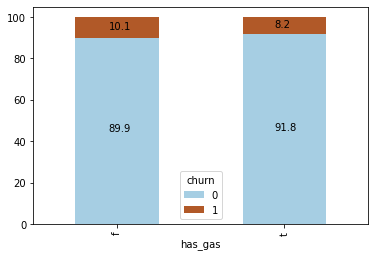

In [20]:
contract_type = client[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'],contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

ax = contract_percentage.plot.bar(stacked=True, cmap="Paired")
for p in ax.patches:
    pad=0.99
    # Calculate annotation
    value = str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value == '0.0':
        continue
    ax.annotate(
        value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, 
         (p.get_y()+p.get_height()/2)*pad)

    )

## Margins

/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

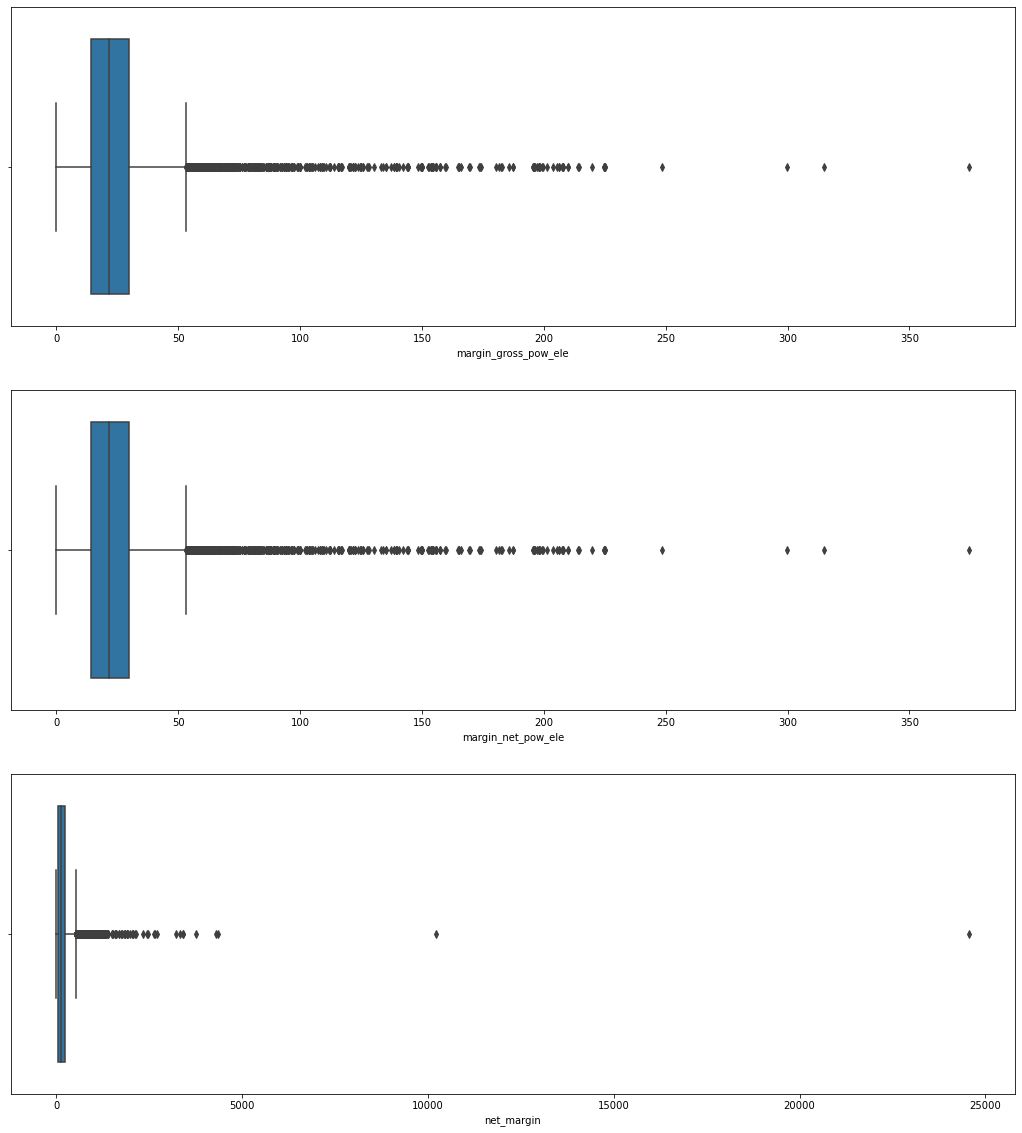

In [21]:
margin = client[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin']]

fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

There are a lot of outliers that will be dealt with in the next step.

## Subscribe Power

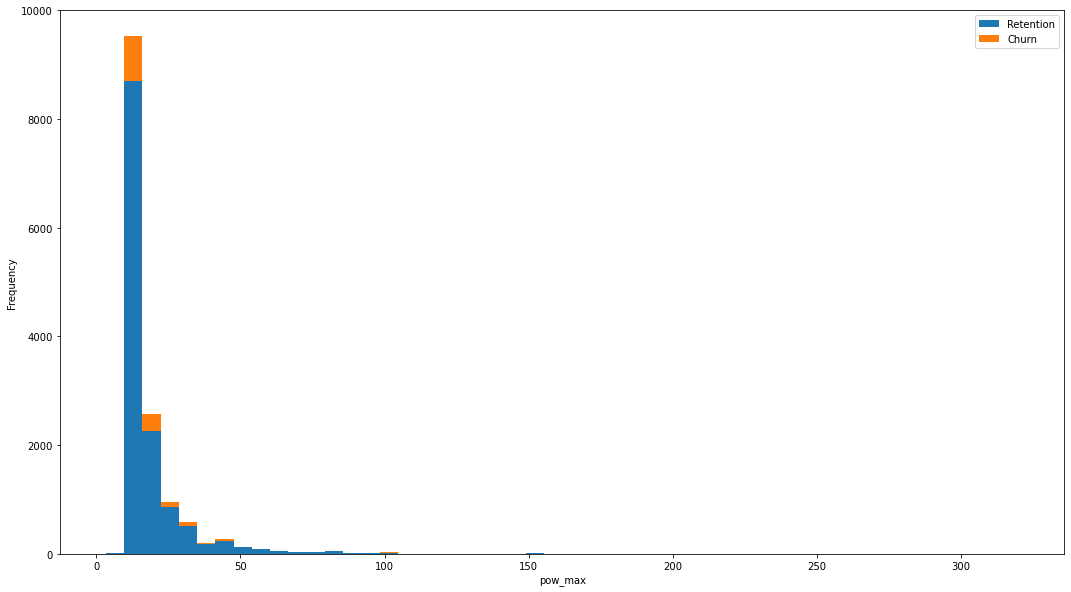

In [22]:
power = client[['id', 'pow_max', 'churn']]
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

## Other columns

In [23]:
others = client[['id', 'nb_prod_act', 'num_years_antig', 'origin_up','churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

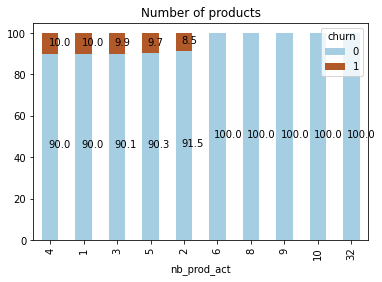

In [24]:
#Number of products

ax = products_percentage.plot.bar(stacked=True, cmap="Paired")
plt.title("Number of products")
for p in ax.patches:
    pad=0.99
    # Calculate annotation
    value = str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value == '0.0':
        continue
    ax.annotate(
        value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, 
         (p.get_y()+p.get_height()/2)*pad)

    )

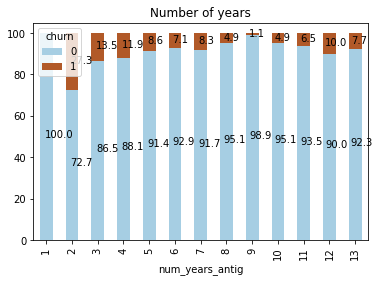

In [25]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)

ax = years_antig_percentage.plot.bar(stacked=True, cmap="Paired")
plt.title("Number of years")
for p in ax.patches:
    pad=0.99
    # Calculate annotation
    value = str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value == '0.0':
        continue
    ax.annotate(
        value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, 
         (p.get_y()+p.get_height()/2)*pad)

    )

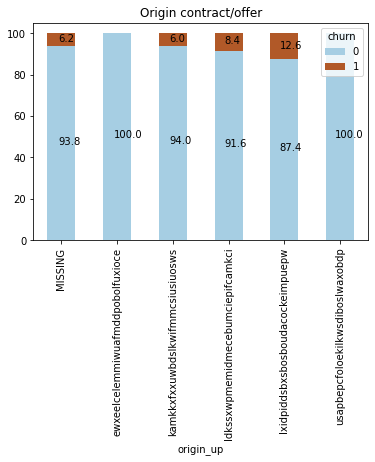

In [26]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)

ax = origin_percentage.plot.bar(stacked=True, cmap="Paired")
plt.title("Origin contract/offer")
for p in ax.patches:
    pad=0.99
    # Calculate annotation
    value = str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value == '0.0':
        continue
    ax.annotate(
        value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, 
         (p.get_y()+p.get_height()/2)*pad)

    )

# Hypothesis Testing

Text(0.5, 1.0, 'Consumption of electricity in the past 12 months.')

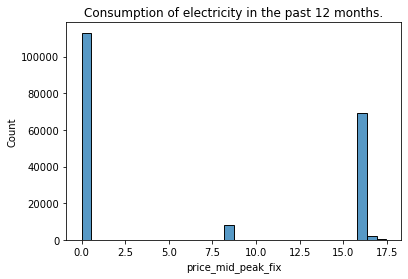

In [27]:
ax = sns.histplot(x="price_mid_peak_fix", data=price)
ax.set_title("Consumption of electricity in the past 12 months.")

In [28]:
# Transform date columns to datetime type
client["date_activ"] = pd.to_datetime(client["date_activ"],format='%Y-%m-%d')
client["date_end"] = pd.to_datetime(client["date_end"], format='%Y-%m-%d')
client["date_modif_prod"] = pd.to_datetime(client["date_modif_prod"],format='%Y-%m-%d')
client["date_renewal"] = pd.to_datetime(client["date_renewal"],format='%Y-%m-%d')
price['price_date'] = pd.to_datetime(price['price_date'],format='%Y-%m-%d')

In [29]:
# Create yearly sensitivity features
var_year = price.groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()

# Create last 6 months sensitivity features
var_6m = price[price['price_date'] > '2015-06-01'].groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()

<b>Sub-Task 2:</b>

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.

In [30]:
var_year.columns

Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [31]:
var_6m.columns

Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [32]:
# Rename columns
var_year = var_year.rename(
 columns={
    "price_off_peak_var": "var_year_price_p1_var",
    "price_peak_var": "var_year_price_p2_var",
    "price_mid_peak_var": "var_year_price_p3_var",
    "price_off_peak_fix": "var_year_price_p1_fix",
    "price_peak_fix": "var_year_price_p2_fix",
    "price_mid_peak_fix": "var_year_price_p3_fix"
    }
)

var_year["var_year_price_p1"] = var_year["var_year_price_p1_var"] + var_year["var_year_price_p1_fix"]
var_year["var_year_price_p2"] = var_year["var_year_price_p2_var"] + var_year["var_year_price_p2_fix"]
var_year["var_year_price_p3"] = var_year["var_year_price_p3_var"] + var_year["var_year_price_p3_fix"]

var_6m = var_6m.rename(
columns={
    "price_off_peak_var": "var_6m_price_p1_var",
    "price_peak_var": "var_6m_price_p2_var",
    "price_mid_peak_var": "var_6m_price_p3_var",
    "price_off_peak_fix": "var_6m_price_p1_fix",
    "price_peak_fix": "var_6m_price_p2_fix",
    "price_mid_peak_fix": "var_6m_price_p3_fix"
    }
)

var_6m["var_6m_price_p1"] = var_6m["var_6m_price_p1_var"] + var_6m["var_6m_price_p1_fix"]
var_6m["var_6m_price_p2"] = var_6m["var_6m_price_p2_var"] + var_6m["var_6m_price_p2_fix"]
var_6m["var_6m_price_p3"] = var_6m["var_6m_price_p3_var"] + var_6m["var_6m_price_p3_fix"]

# Merge into 1 dataframe
price_features = pd.merge(var_year, var_6m, on='id')

In [33]:
price_features.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00


In [34]:
price_analysis = pd.merge(price_features, client[['id', 'churn']], on='id')
price_analysis.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0


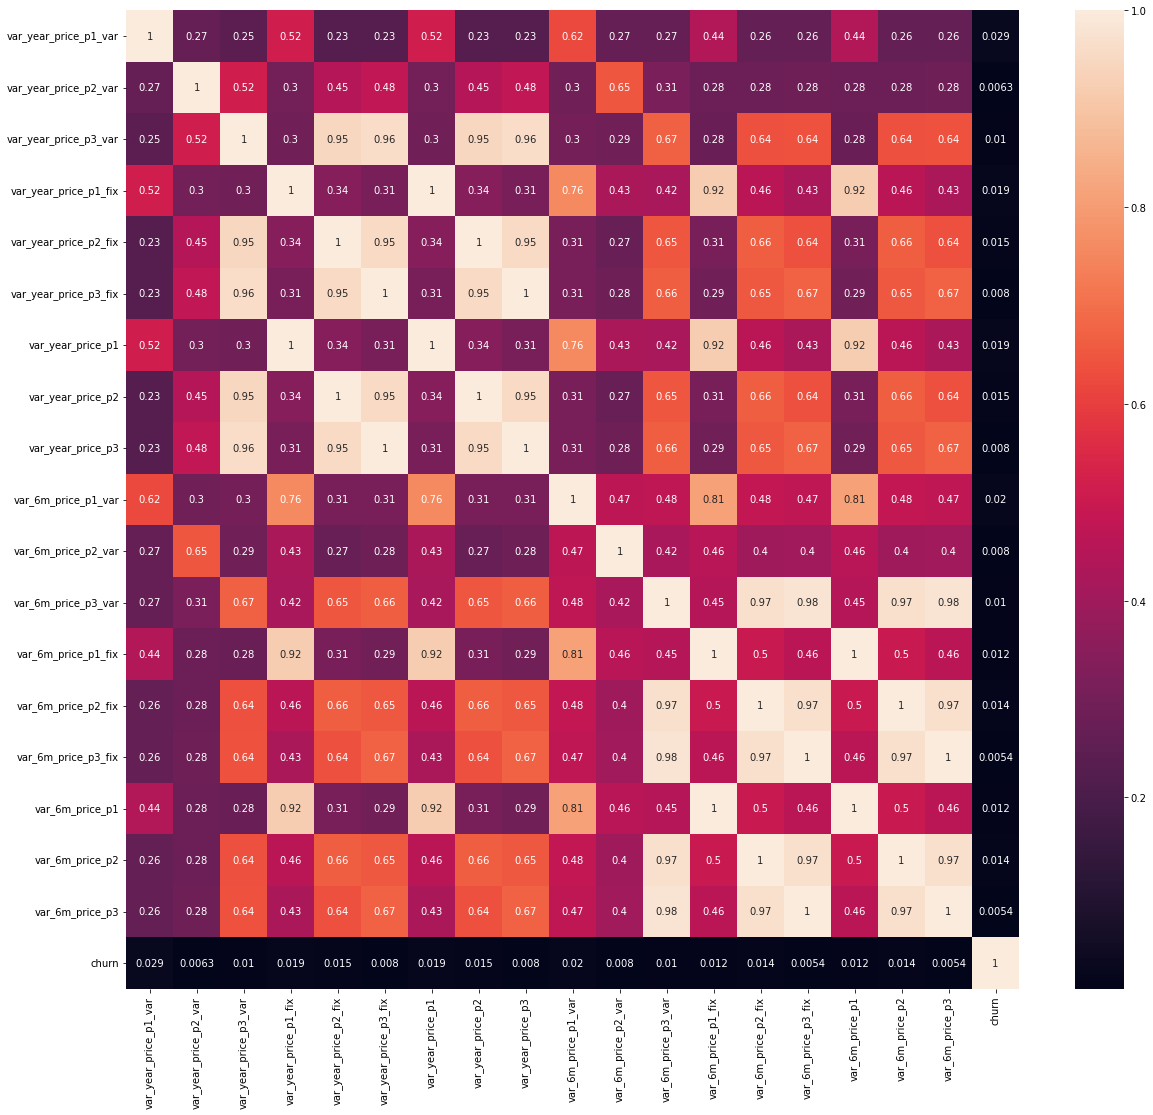

In [35]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation plot, it shows that the price sensitivity features a high inter-correlation with
each other, but overall the correlation with churn is very low. This indicates that there is a weak
linear relationship between price sensitity and churn. This suggests that for price sensivity to be a
major driver for predicting churn, we may need to engineer the features differently.

In [36]:
merged_data = pd.merge(client.drop(columns=['churn']), price_analysis,on='id')
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [37]:
merged_data.to_csv('clean_data_after_eda.csv')

## Convert has gas

In [39]:
client["has_gas"] = client["has_gas"].apply(lambda x: 1 if x=='t' else 0)

In [40]:
client.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


# Statsmodel

In [41]:
X = client[client.columns.drop(['id','channel_sales', 'churn', 'date_activ', 
                                'date_end', 'date_modif_prod', 'date_renewal', 'origin_up'])]
y = client["churn"]

X = sm.add_constant(X)
log_reg = sm.Logit(y, X).fit()



"""model = sm.OLS(y, X).fit()
model_prediction = model.predict(X)

model_details = model.summary()
print(model_details.summary())"""

/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.307788
         Iterations 28


/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


'model = sm.OLS(y, X).fit()\nmodel_prediction = model.predict(X)\n\nmodel_details = model.summary()\nprint(model_details.summary())'

In [42]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                14606
Model:                          Logit   Df Residuals:                    14587
Method:                           MLE   Df Model:                           18
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                 0.03448
Time:                        18:25:13   Log-Likelihood:                -4495.5
converged:                       True   LL-Null:                       -4656.1
Covariance Type:            nonrobust   LLR p-value:                 2.171e-57
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.3575      0.386     -6.115      0.000      -3.113      -1.602
cons_12m                       -3.136e-07   3.12e-07     -1.005      0.

/Users/kierradangerfield/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


1. Statistical Significance columns for churn

 • forecast_price_energy_off_peak
 • forecast_price_energy_peak 
 • net_margin
 • num_years_antig 
 • pow_max 
 
 The small P values indicate that we can reject the null hypothesis that those columns have no effect on churn.
 <br/>
 
2. pseudo R-squared 

 The pseudo R-squared value is 0.03448, which is quite low. This tells us that the predictor variables in the model don’t do a very good job of predicting the value of the response variable.
 
 <br/>
3. LLR p-value

 This value can be thought of as the substitute to the p-value for the overall F-value of a linear regression model.

 The LLR p-value is 2.171e-57. We can conclude that the model overall is “useful” and is better at predicting the values of the response variable compared to a model with no predictor variables.